In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from IPython.display import display_markdown

In [2]:
import en_vectors_web_lg
nlp = en_vectors_web_lg.load()

In [3]:
MAX_WORDS_IN_SENTENCE = 200
TEXT_COLUMN = "Text"
LIMIT = -1
dataset_id = 'food_{}_{}'.format(TEXT_COLUMN.lower(), LIMIT if LIMIT > 0 else 'all')

## Data loading and preview

### Loading

In [4]:
from sklearn.model_selection import train_test_split
from shared.data import load_fine_food_reviews

X, y = load_fine_food_reviews(limit=LIMIT, text_column=TEXT_COLUMN)

test_count = min(2000, int(0.25 * len(X)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_count, random_state=42)

### Preview

In [5]:
from machine_learning.plot_helpers import describe_data

describe_data(X, y)

display_markdown('### Train count: {}'.format(len(X_train)), raw=True)
display_markdown('### Test count:  {}'.format(len(X_test)), raw=True)

### Data sample

,X,y
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price. there was a wid...,1
5,i got a wild hair for taffy and ordered this f...,1
6,this saltwater taffy had great flavors and was...,1
7,this taffy is so good. it is very soft and ch...,1
8,right now i'm mostly just sprouting this so my...,1
9,this is a very healthy dog food. good for thei...,1


#### Text stats

count                                                525814
unique                                               363827
top       this review will make me sound really stupid, ...
freq                                                    199
Name: X, dtype: object

#### Words length stats

count    525814.000000
mean         79.016667
std          78.447587
min           3.000000
25%          33.000000
50%          55.000000
75%          96.000000
max        2520.000000
Name: X, dtype: float64

#### Labels stats

count    525814.000000
mean          0.843981
std           0.362874
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: y, dtype: float64

#### Labels counts

1    443777
0     82037
Name: y, dtype: int64

1    0.843981
0    0.156019
Name: y, dtype: float64

### Train count: 523814

### Test count:  2000

## Models

In [5]:
input_samples = [
    "We went there to eat dinner, and it was delicious",
    "One of the best suppers I've ever eaten",
    "Totally disgusting dish. I think cook made this with his eyes closed"
]

In [6]:
from shared import models
from machine_learning.plot_helpers import display_example_predictions
from machine_learning.evaluation import evaluate_and_report


def train_model_and_display_results(model, X=X_train, y=y_train, **train_params):
    display_markdown('## {}'.format(model.__class__.__name__), raw=True)
    display_markdown('#### Training', raw=True)
    model.load_or_train(X, y, **train_params)

    display_markdown("#### Overview of created model", raw=True)
    display(model.summary())

    display_markdown('#### Model results', raw=True)
    display_example_predictions(model, input_samples)
    evaluate_and_report(model, X_test, y_test)

Using TensorFlow backend.


Loading cached data...
Unable to load data, preprocessing...
Preprocessed and saved to 'kerasmodel_food_text_all.h5'


## KerasModel

#### Training

Loading model...
Unable to load model, training...
Epoch 1/5
4093/4093 [==============================] - 145s 35ms/step - loss: 0.1145 - acc: 0.8968
Epoch 2/5
4093/4093 [==============================] - 143s 35ms/step - loss: 0.0739 - acc: 0.9224
Epoch 3/5
4093/4093 [==============================] - 143s 35ms/step - loss: 0.0711 - acc: 0.9237
Epoch 4/5
4093/4093 [==============================] - 144s 35ms/step - loss: 0.0693 - acc: 0.9247
Epoch 5/5
4093/4093 [==============================] - 144s 35ms/step - loss: 0.0689 - acc: 0.9248
Model 'keras_food_text_all_b3f214f0.h5' saved


#### Overview of created model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 196, 32)           48032     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 64)            10304     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

None

#### Model results

#### Predicted scores

,score,text
0,0.906017,"We went there to eat dinner, and it was delicious"
1,0.993009,One of the best suppers I've ever eaten
2,0.168423,Totally disgusting dish. I think cook made this with his eyes closed


#### Highest 5

,pred,prob,real,text
1514,1.000000,0.999965,1,"love this coffee, have recommended and shared with friends. good smooth, strong and delicious flavor at an excellent price. i ..."
43,1.000000,0.999930,1,i have personally been on a mission to find my favorite jerky for a few years now. this is by far my favorite jerky - just a ...
762,1.000000,0.999923,1,"this was the perfect food for my finicky feline. my vet tried all the fancy prescription ""skinny"" foods and while they worked..."
1798,1.000000,0.999922,1,i love this company and i will use them time after time! my boyfriend and i adore these suckers and they taste amazing with go...
1870,1.000000,0.999914,1,"my girlfriend loves european milk chocolate and i got this for her. she loves it, and i am a happy dude.<br /><br />its very s..."


#### Lowest 5

,pred,prob,real,text
1843,0.000000,0.004004,0,i was hoping for some bulk inexpensive quality peanuts to make pb. this was not the case. they come in really cheap packaging ...
470,0.000000,0.005553,0,"this is my second time buying goji juice from this account. the 1st 2 bottles i bought were red, sweet, and tasted fruity. the..."
1392,0.000000,0.007893,0,this should be called sad baby--it's awful. my baby absolutely hates it! i tasted a tiny bit<br />and it was bland to the poin...
824,0.000000,0.010690,0,"disappointed!!!! not returnable, too bad. packaging from amazon seemed great as usual. and box was not crushed or battered ..."
510,0.000000,0.010715,0,"bought the teriyaki flavor .....totally gross,<br /><br />do not waste your money on this slimy stuff.... could barely finish ..."


#### Highest 5 mispredicted

,pred,prob,real,text
1714,1.000000,0.997805,0,not so great lemon flavor!<br />it's very hard to find soy free!<br />this is a great brand! i prefer the ginger much better t...
1894,1.000000,0.996422,0,"my 10-month old loves these! they are helpful to teach him how to eat and relieve pain from teething, too. look around for a b..."
440,1.000000,0.993576,0,"these have a great crunch and it's great that it's low fat. however, it's way too salty. 280mg per serving is more than twice ..."
998,1.000000,0.993002,0,"wolfgang puck's ""breakfast in bed"" is a much more flavorful and robust medium roast than this one."
1500,1.000000,0.991314,0,i found no benefit in taking the kirkland energy shot where the 5 hour energy has me going in a few of minutes.<br /><br />in ...


#### Lowest 5 mispredicted

,pred,prob,real,text
1181,0.000000,0.014745,1,"one of the three packs was open before arriving. the paste was oozing out the side. i can't return it, and i am having a lot..."
393,0.000000,0.065325,1,"the popcorn is great. unfortunately, the bags are defective and the buttery flavoring has seeped out thus making the outside ..."
418,0.000000,0.117673,1,"the soup itself is very good tasting, and i would not hesitate to order it again except this is not the first time (including ..."
1939,0.000000,0.174862,1,"i place an order on july 11, 2011 of 15 (12 pack e/a) of vita coco coconut water with this horrible company ""goshoptnt"" and i ..."
402,0.000000,0.208973,1,these jelly beans are great for a party activity (think harry potter) or as a gag gift. there are 5-6 different colors of jell...


#### Classification report for keras

             precision    recall  f1-score   support

   Negative       0.91      0.47      0.62       313
   Positive       0.91      0.99      0.95      1687

avg / total       0.91      0.91      0.90      2000



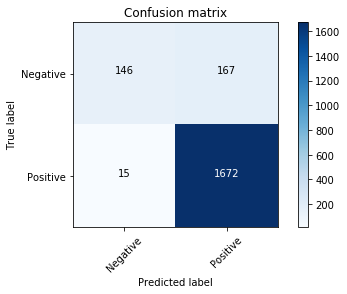

In [8]:
from machine_learning.cache import get_preprocessed_data

keras_model = models.KerasModel(
    nlp, 
    dataset_id, 
    max_words_in_sentence=MAX_WORDS_IN_SENTENCE, 
    epochs=5)

X_keras_preprocessed = get_preprocessed_data(keras_model, dataset_id, X_train)

train_model_and_display_results(keras_model, X_keras_preprocessed, preprocessed=True)

# we need memory for further processing
del X_keras_preprocessed

In [8]:
from machine_learning.cache import get_preprocessed_data
# preprocessed data for all sklearn-based models

model = models.SklearnModel(nlp, dataset_id)
X_sklearn_preprocessed = get_preprocessed_data(model, dataset_id, X_train)

Loading cached data...
Loaded data from 'sklearnmodel_food_text_all.h5'


## SpacySVCModel

#### Training

Loading model...
Unable to load model, training...


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 'svc_food_text_all_80e28a4f.pkl' saved


#### Overview of created model

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Model results

#### Predicted scores

,score,text
0,0.996552,"We went there to eat dinner, and it was delicious"
1,0.999998,One of the best suppers I've ever eaten
2,0.001790,Totally disgusting dish. I think cook made this with his eyes closed


#### Highest 5

,pred,prob,real,text
266,1.000000,1.000000,1,"a refreshing cold beverage and a soothing, perfect, hot cup of tea. offers healthful benefits."
1810,1.000000,1.000000,1,"a healthy choice for gum, great flavor. customer service was excellent - fast and courteous."
630,1.000000,1.000000,1,"great variety to keep on hand! friends and family will enjoy sampling with you. tea, hot chocolate, and many coffees. includ..."
1514,1.000000,1.000000,1,"love this coffee, have recommended and shared with friends. good smooth, strong and delicious flavor at an excellent price. i ..."
155,1.000000,1.000000,1,the oatmeal is delicious! great breakfast meal that is quick and easy! it's organic too!


#### Lowest 5

,pred,prob,real,text
824,0.000000,0.000083,0,"disappointed!!!! not returnable, too bad. packaging from amazon seemed great as usual. and box was not crushed or battered ..."
1390,0.000000,0.000264,0,i received this item poorly packaged and contents were scuffed and jumbled. it was meant for a gift and looked like a returned...
510,0.000000,0.000643,0,"bought the teriyaki flavor .....totally gross,<br /><br />do not waste your money on this slimy stuff.... could barely finish ..."
1732,0.000000,0.000716,0,i should have known when the product told me to rinse it for several minutes to get rid of the putrid smell - smells like they...
850,0.000000,0.001358,0,"the cote d'or dark 86% brut chocolate cocoa, 3.5-ounce bars (pack of 10) is close to the worst chocolate i have eaten, if not ..."


#### Highest 5 mispredicted

,pred,prob,real,text
998,1.000000,1.000000,0,"wolfgang puck's ""breakfast in bed"" is a much more flavorful and robust medium roast than this one."
1714,1.000000,1.000000,0,not so great lemon flavor!<br />it's very hard to find soy free!<br />this is a great brand! i prefer the ginger much better t...
1894,1.000000,0.995672,0,"my 10-month old loves these! they are helpful to teach him how to eat and relieve pain from teething, too. look around for a b..."
1256,1.000000,0.994738,0,these crackers have no flavor what so ever and for 100 calories you get the same amount as the nabisco 100 calorie cookies. sa...
615,1.000000,0.994000,0,"i would rather spend the time and effort for a better flavor. the pods are individually sealed, and easy to use. the flavor is..."


#### Lowest 5 mispredicted

,pred,prob,real,text
811,0.000000,0.011772,1,i had mole problems and i killed the bugs. i had killed the whole yard to replant and don't know if there were less bugs in t...
1524,0.000000,0.018908,1,wish there was a better mix of black/brown hooves. the box contained mostly black hooves. otherwise the order was as decribed
1712,0.000000,0.024831,1,"what can i say, the deer and the antelop did not do anything to this coffee. neither did the caribou. it's ok, drinkable."
393,0.000000,0.029243,1,"the popcorn is great. unfortunately, the bags are defective and the buttery flavoring has seeped out thus making the outside ..."
142,0.000000,0.032724,1,"okay, i jumped the gun, because they were sending me the review information, before i received my chips, so i thought i would ..."


#### Classification report for svc

             precision    recall  f1-score   support

   Negative       0.68      0.55      0.61       313
   Positive       0.92      0.95      0.94      1687

avg / total       0.88      0.89      0.88      2000



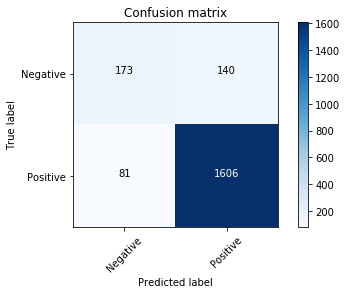

In [9]:
# it's almost impossible to train SVC on full dataset due to time complexity
svc_limit = min(20000, len(X_sklearn_preprocessed))

train_model_and_display_results(
    models.SVCModel(
        nlp, dataset_id, 
        kernel="linear", C=0.025,
        probability=True),
    X_sklearn_preprocessed[:svc_limit], y_train[:svc_limit], preprocessed=True
)

## SpacyDecisionTreeClassifierModel

#### Training

Loading model...
Unable to load model, training...
Model 'decisiontreeclassifier_food_text_all_18268fab.pkl' saved


#### Overview of created model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model results

#### Predicted scores

,score,text
0,0.937974,"We went there to eat dinner, and it was delicious"
1,0.976629,One of the best suppers I've ever eaten
2,0.680393,Totally disgusting dish. I think cook made this with his eyes closed


#### Highest 5

,pred,prob,real,text
9,1.000000,0.976629,1,i purchased these to snack on after my workouts. now i find myself just snacking on them all the time!! they're really good an...
19,1.000000,0.976629,1,this is the best red rooibos tea i have found!! recommend it to all my friends...
26,1.000000,0.976629,1,this tea kit is wonderful. it has wonderful tea that really does what it says. i love the heartburn tea. it helped when downin...
27,1.000000,0.976629,1,"this herbal tea is well balanced and pleasant. it tastes to me like good real lemon, but not acidic. the ginger seems just e..."
31,1.000000,0.976629,1,"i got this and i also got the small dog salmon zukes, i have a little chihuahua, he immediately loved the salmon ones, but not..."


#### Lowest 5

,pred,prob,real,text
68,0.000000,0.321455,0,"i'm not sure if this box of this product was kept on the shelf too long, or if it went through a drastic temperature change wh..."
74,0.000000,0.321455,1,i was of course wary of buying something as perishable as pine nuts over the internet whether from an amazon seller or not so ...
103,0.000000,0.321455,0,i wish i could give this stuff zero stars. it's bad enough that the label is deceptive and obviously meant to mislead consume...
129,0.000000,0.321455,0,after reading the add copy i was expecting a much higher quality<br />(read this as better tasting) cinnamon oil.<br />the fla...
209,0.000000,0.321455,0,this jerkey is possibly the worst i have ever eaten....the texture is very thready and dry...i tried giving some to my dog and...


#### Highest 5 mispredicted

,pred,prob,real,text
99,1.000000,0.976629,0,"the flavor is ""o.k."" won't buy again! very thin, and very tough! can get any generic brand with this texture! expected thi..."
361,1.000000,0.976629,0,"terrible texture, despite several trials of cooking lengths and with/without salted water. always turns out mushy, sticks to ..."
364,1.000000,0.976629,0,"this chai latte mix is weak and not creamy. for starbucks like taste, try the big train canister."
467,1.000000,0.976629,0,"these pop chips are satisfying and good for a snack, but not what i expected. they do not taste as good, crisp or as light as..."
663,1.000000,0.976629,0,"i received a 12 pack of mrs fields from amazon (fulfilled by lakewood candies, llc), slightly open at the front. suspicious, ..."


#### Lowest 5 mispredicted

,pred,prob,real,text
74,0.000000,0.321455,1,i was of course wary of buying something as perishable as pine nuts over the internet whether from an amazon seller or not so ...
327,0.000000,0.321455,1,"i used sugartwin for years prior to the introduction of aspartame, and had been quite happy with it. when the almost constant..."
528,0.000000,0.321455,1,my husband complained that split peas didn't have any taste anymore. he really likes these and said they taste like split pea...
602,0.000000,0.321455,1,"i was a bit skeptical given lipton's reputation for bastardizing and oversweetening some of its products, but its flavored ""gr..."
724,0.000000,0.321455,1,i've only tried one of the brownies. the one that i ate definitely had no raspberry flavor. the brownie is absolutely deliciou...


#### Classification report for decisiontreeclassifier

             precision    recall  f1-score   support

   Negative       0.59      0.24      0.34       313
   Positive       0.87      0.97      0.92      1687

avg / total       0.83      0.85      0.83      2000



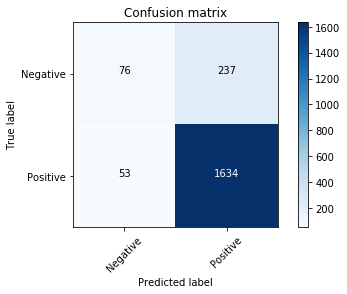

In [11]:
train_model_and_display_results(
    models.DecisionTreeModel(nlp, dataset_id, max_depth=5),
    X_sklearn_preprocessed, preprocessed=True
)

## SpacyMLPClassifierModel

#### Training

Loading model...
Unable to load model, training...


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.24752875
Iteration 2, loss = 0.22185068
Iteration 3, loss = 0.21471430
Iteration 4, loss = 0.20945847
Iteration 5, loss = 0.20458964
Iteration 6, loss = 0.20096828
Iteration 7, loss = 0.19821968
Iteration 8, loss = 0.19552550
Iteration 9, loss = 0.19300199
Iteration 10, loss = 0.19085455
Model 'mlpclassifier_food_text_all_6a1a2e6a.pkl' saved


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Overview of created model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

#### Model results

#### Predicted scores

,score,text
0,0.999220,"We went there to eat dinner, and it was delicious"
1,0.999992,One of the best suppers I've ever eaten
2,0.000728,Totally disgusting dish. I think cook made this with his eyes closed


#### Highest 5

,pred,prob,real,text
266,1.000000,1.000000,1,"a refreshing cold beverage and a soothing, perfect, hot cup of tea. offers healthful benefits."
1810,1.000000,1.000000,1,"a healthy choice for gum, great flavor. customer service was excellent - fast and courteous."
972,1.000000,1.000000,1,"great service! arrived in great time, and things were perfect! look forward to ordering from you again."
454,1.000000,1.000000,1,these are currently my favorite snack! they are very healthy and taste delicious. yummy unique mix of flavors. definitely a...
692,1.000000,1.000000,1,"easy to start, easy to use and maintain and the natural leavening is very potent. by the way the baked goods are delicious!!!!"


#### Lowest 5

,pred,prob,real,text
1388,0.000000,0.000795,0,i had such high hopes for this apple cider but it was a huge disappointment...terribly sweet and an awful artificial flavor.
1493,0.000000,0.002232,0,i purchased these pepperidge farm cookies for a family member that is sick in the hospital. the cookies had an expiration date...
956,0.000000,0.002320,0,"i have purchased these in the past, but this order tasted a little stale. i have purchased food many times, but this was the f..."
17,0.000000,0.003111,0,this coffee smells and tastes absolutely disgusting. it smells like sugared rubbing alcohol. it tastes like vomit. i have n...
510,0.000000,0.003276,0,"bought the teriyaki flavor .....totally gross,<br /><br />do not waste your money on this slimy stuff.... could barely finish ..."


#### Highest 5 mispredicted

,pred,prob,real,text
1714,1.000000,0.999411,0,not so great lemon flavor!<br />it's very hard to find soy free!<br />this is a great brand! i prefer the ginger much better t...
1894,1.000000,0.997015,0,"my 10-month old loves these! they are helpful to teach him how to eat and relieve pain from teething, too. look around for a b..."
220,1.000000,0.991419,0,"i've been giving my daughter gerber fruits, veggies, and meat as everyday-meals since she was 6 months old, thinking that she'..."
276,1.000000,0.981055,0,like too many gf products these are drowning in salt to drown out the bland rice flour flavor. i discovered glutino crackers o...
822,1.000000,0.980474,0,"i have a two and a half year old female boxer that has allergies to most commercial dog foods, so i keep her on a diet free of..."


#### Lowest 5 mispredicted

,pred,prob,real,text
1939,0.000000,0.014732,1,"i place an order on july 11, 2011 of 15 (12 pack e/a) of vita coco coconut water with this horrible company ""goshoptnt"" and i ..."
556,0.000000,0.036900,1,"okay when i go to the beach i have to scrape barnacles off the side of my dad's boat- slimy, sticky, smelly barnacles. please..."
1181,0.000000,0.058100,1,"one of the three packs was open before arriving. the paste was oozing out the side. i can't return it, and i am having a lot..."
723,0.000000,0.068222,1,these peppers are indeed very hot. when i first opened the package and took one of the peppers out to try i nibbled on just a...
969,0.000000,0.095819,1,"it didn't cause any stomach upset, but was pretty good. it's not as robust as one might like, and the aroma was not very stron..."


#### Classification report for mlpclassifier

             precision    recall  f1-score   support

   Negative       0.78      0.69      0.73       313
   Positive       0.94      0.96      0.95      1687

avg / total       0.92      0.92      0.92      2000



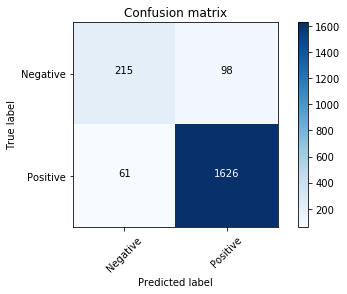

In [13]:
train_model_and_display_results(
    models.MLPModel(
        nlp, dataset_id,
        hidden_layer_sizes=(50, 50), max_iter=10, verbose=True),
    X_sklearn_preprocessed, preprocessed=True
)

## SpacyGaussianNBModel

#### Training

Loading model...
Unable to load model, training...


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 'gaussiannb_food_text_all_d41d8cd9.pkl' saved


#### Overview of created model

GaussianNB(priors=None)

#### Model results

#### Predicted scores

,score,text
0,1.000000,"We went there to eat dinner, and it was delicious"
1,1.000000,One of the best suppers I've ever eaten
2,0.999999,Totally disgusting dish. I think cook made this with his eyes closed


#### Highest 5

,pred,prob,real,text
7,1.000000,1.000000,1,"i love mott's healthy harvest applesauce cups. it is only fruit-no added sugar. these are blueberry, but in stores you can als..."
19,1.000000,1.000000,1,this is the best red rooibos tea i have found!! recommend it to all my friends...
23,1.000000,1.000000,1,"these are a favorite candy treat but, for some reason, unavailable in local stores. delivery was in good time."
32,1.000000,1.000000,1,we love this mix! we use the muffin recipe on back and make donuts with our electric donut maker~yum. all the recipes on back...
33,1.000000,1.000000,1,"the best horseradish cheese i've ever tasted, i'm addicted. it's spicy and creamy. if you love horseradish this is a product y..."


#### Lowest 5

,pred,prob,real,text
544,0.000000,0.000000,0,"i really hesitate to leave a negative review since we love the chips, but both of the last 2 shipments were destroyed. both b..."
811,0.000000,0.000000,1,i had mole problems and i killed the bugs. i had killed the whole yard to replant and don't know if there were less bugs in t...
1462,0.000000,0.000000,0,"i hope someone in charge of this sale reads this, because of all the cans in the two cases of soup i ordered, easily 75% of th..."
1367,0.000000,0.000000,0,"i have bought three bottles of this product. i have not felt any better; most of the time, i have felt much worse. i was under..."
1834,0.000000,0.000000,0,"i got the case of beans in the mail yesterday. today when i got a chance to open the box, every single can was dented. the s..."


#### Highest 5 mispredicted

,pred,prob,real,text
364,1.000000,1.000000,0,"this chai latte mix is weak and not creamy. for starbucks like taste, try the big train canister."
440,1.000000,1.000000,0,"these have a great crunch and it's great that it's low fat. however, it's way too salty. 280mg per serving is more than twice ..."
998,1.000000,1.000000,0,"wolfgang puck's ""breakfast in bed"" is a much more flavorful and robust medium roast than this one."
1137,1.000000,1.000000,0,"dry, tasteless. no carrot flavor. no spice flavor. go raw has some awesome cookies. this is not one of them. stay with the lem..."
1256,1.000000,1.000000,0,these crackers have no flavor what so ever and for 100 calories you get the same amount as the nabisco 100 calorie cookies. sa...


#### Lowest 5 mispredicted

,pred,prob,real,text
811,0.000000,0.000000,1,i had mole problems and i killed the bugs. i had killed the whole yard to replant and don't know if there were less bugs in t...
142,0.000000,0.000000,1,"okay, i jumped the gun, because they were sending me the review information, before i received my chips, so i thought i would ..."
902,0.000000,0.000000,1,i bought a 'jar' because its sweetened with xylitol. i was skeptical after my first piece. yes the intense peppermint rush see...
1631,0.000000,0.000000,1,"product arrived as promised. i thought the shipping was extremely high and had i realized it was that high, i would not have ..."
314,0.000000,0.000000,1,"i've been using these bags for only three weeks now, and so far no complaints. they seal easily, haven't leaked yet, quality f..."


#### Classification report for gaussiannb

             precision    recall  f1-score   support

   Negative       0.29      0.76      0.42       313
   Positive       0.94      0.66      0.78      1687

avg / total       0.84      0.68      0.72      2000



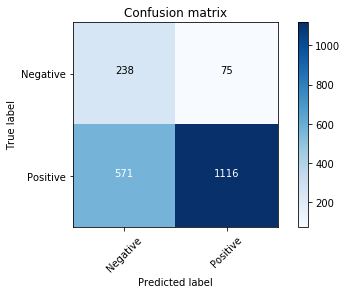

In [15]:
train_model_and_display_results(
    models.GaussianNBModel(
        nlp, dataset_id
    ),
    X_sklearn_preprocessed, preprocessed=True
)

In [ ]:
train_model_and_display_results(
    models.AdaBoostModel(
        nlp, dataset_id
    ),
    X_sklearn_preprocessed, preprocessed=True
)

## SpacyAdaBoostClassifierModel

#### Training

Loading model...
Unable to load model, training...


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_model_and_display_results(
    models.QuadraticDiscriminantAnalysisModel(
        nlp, dataset_id
    ),
    X_sklearn_preprocessed, preprocessed=True
)

In [ ]:
train_model_and_display_results(
    models.LogisticRegressionModel(
        nlp, dataset_id,
        C=1e5
    ),
    X_sklearn_preprocessed, preprocessed=True
)

In [ ]:
train_model_and_display_results(models.GradientBoostingModel(
        nlp, dataset_id,
        n_estimators=500, max_depth=2
    ),
    X_sklearn_preprocessed, preprocessed=True
)